# ABBA-BABA Test on 3R-free excluding the GSTE region
Performed on:

  - Far-west pops <b>((([<i>An.coluzzii <sub>pops</sub></i> ], [Far-west<sub>pops</sub>]),  <i>An.gambiae <sub>pops</sub></i> ), [ <i>An.christyi</i> ])</b>
  - Kenya population  <b>((([<i>An.coluzzii <sub>pops</sub></i> ], [ <i>An.gambiae <sub>pops</sub></i> ]), Kenya), [ <i>An.christyi</i> ])</b>
  
In the last part of the notebook also testing Kenya vs merus and melas populations

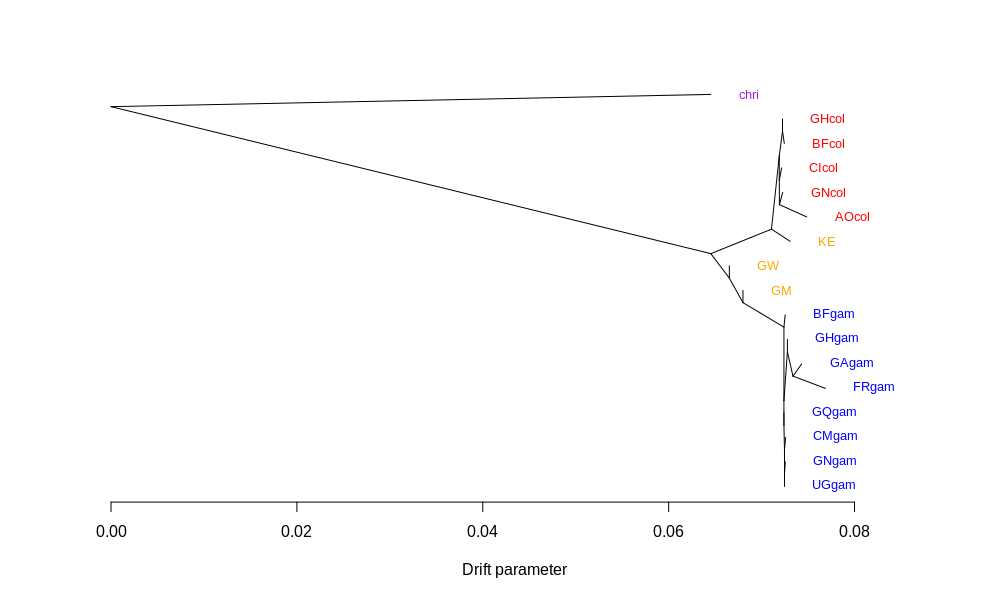

In [2]:
Image(filename='data/Treemix_data/christyi/3R_gste_out/Rplot01.png')

In [1]:
%run imports.ipynb
%run '08222019_functions.ipynb'
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
palette = sns.color_palette()

Workflow:


    - Split 3R Free region in 2: To 2.82Mb, from 2.92Mb and make the allele counts for Ag1000G pops and An.christyi biallelic callsets
    - Merge two allele counts
    - Perform the test

In [2]:
calldata_out= zarr.open('data/outgroup_alleles_phase2.zarr/')
calldata_biallel= zarr.open('data/phase2_biallel_allele_count.zarr/')

In [3]:
an_col = 'AOcol', 'BFcol', 'GNcol', 'CIcol', 'GHcol'
an_gam = 'GHgam', 'CMgam', 'BFgam', 'GNgam', 'GQgam', 'UGgam', 'GAgam', 'FRgam'
an_na = 'GM', 'GW'
out_species = ['arab', 'chri', 'epir', 'mela', 'meru', 'quad']

------------------------------
## Taking out the first region

In [7]:
def count_alleles_pos(chrom, start, stop):
    
    metadata = pd.read_csv("samples.meta.txt", sep="\t")
    pos_all = allel.SortedIndex(callset_biallel[chrom]["variants/POS"])
    loc = pos_all.intersect_range(start, stop)
    loc1, loc2 = pos_all.locate_intersection(loc)
    geno = allel.GenotypeChunkedArray(callset_biallel[chrom]["calldata/GT"])
    geno_subset = geno.subset(sel0=loc1)
    ac = geno_subset.count_alleles()[:]
    grp = metadata.groupby("population")
    grp_indices = grp.indices
    ac_subpops = geno_subset.count_alleles_subpops(grp_indices)

    return ac_subpops

In [8]:
pos_all = allel.SortedIndex(callset_biallel['3R']["variants/POS"])
loc = pos_all.intersect_range(1000000, 2820000)
loc1, loc2 = pos_all.locate_intersection(loc)

In [9]:
ac_3R_first = count_alleles_pos('3R', 1000000, 2820000)
ac_3R_first

{'AOcol': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 156   0
 156   0
 156   0
 ...
 156   0
 156   0
 156   0, 'BFcol': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 150   0
 149   1
 146   4
 ...
 149   1
 150   0
 150   0, 'BFgam': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 184   0
 183   1
 182   2
 ...
 184   0
 184   0
 184   0, 'CIcol': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 142   0
 142   0
 142   0
 ...
 142   0
 142   0
 142   0, 'CMgam': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 594   0
 592   2
 591   3
 ...
 593   1
 593   1
 593   1, 'FRgam': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 48  0
 48  0
 48  0
 ...
 48  0
 48  0
 48  0, 'GAgam': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 138   0
 138   0
 138   0
 ...
 138   0
 138   0
 138   0, 'GHcol': <AlleleCountsArray shape=(522469, 2) dtype=int32>
 110   0
 110   0
 110   0
 ...
 110   0
 110   0
 110   0, 'GHgam': <AlleleCountsArray shape=(522469, 2) dtype=int32>


In [10]:
ac_chri_3R_first = allel.AlleleCountsChunkedArray(calldata_out['3R']['chri']).compress(loc1)
ac_chri_3R_first

<AlleleCountsChunkedArray shape=(522469, 2) dtype=int32 chunks=(65309, 2)
   nbytes=4.0M cbytes=381.7K cratio=10.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

----------------------------------------
## Taking out the second region

In [298]:
loc = pos_all.intersect_range(2_920_000, 37_000_000)
loc1, loc2 = pos_all.locate_intersection(loc)

In [240]:
ac_3R_second = count_alleles_pos('3R', 2920000, 37000000)
ac_3R_second

<AlleleCountsChunkedTable shape=(7731390,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('CIcol', '<i4', (2,)), ('CMgam', '<i4', (2,)), ('FRgam', '<i4', (2,)), ('GAgam', '<i4', (2,)), ('GHcol', '<i4', (2,)), ('GHgam', '<i4', (2,)), ('GM', '<i4', (2,)), ('GNcol', '<i4', (2,)), ('GNgam', '<i4', (2,)), ('GQgam', '<i4', (2,)), ('GW', '<i4', (2,)), ('KE', '<i4', (2,)), ('UGgam', '<i4', (2,))]
   nbytes=943.8M cbytes=85.5M cratio=11.0
   values=allel.chunked.storage_zarr.ZarrTable>

In [299]:
ac_chri_3R_second = allel.AlleleCountsChunkedArray(calldata_out['3R']['chri']).compress(loc1)
ac_chri_3R_second

<AlleleCountsChunkedArray shape=(7731390, 2) dtype=int32 chunks=(120803, 2)
   nbytes=59.0M cbytes=5.4M cratio=11.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

-----------------------------------
## Merge the datasets

In [258]:
ac_3R_gste_out =  allel.AlleleCountsChunkedTable(np.append(ac_3R_first, ac_3R_second))
ac_3R_gste_out

<AlleleCountsChunkedTable shape=(8253859,) dtype=[('AOcol', '<i4', (2,)), ('BFcol', '<i4', (2,)), ('BFgam', '<i4', (2,)), ('CIcol', '<i4', (2,)), ('CMgam', '<i4', (2,)), ('FRgam', '<i4', (2,)), ('GAgam', '<i4', (2,)), ('GHcol', '<i4', (2,)), ('GHgam', '<i4', (2,)), ('GM', '<i4', (2,)), ('GNcol', '<i4', (2,)), ('GNgam', '<i4', (2,)), ('GQgam', '<i4', (2,)), ('GW', '<i4', (2,)), ('KE', '<i4', (2,)), ('UGgam', '<i4', (2,))]
   nbytes=1007.6M
   values=numpy.ndarray>

In [300]:
ac_3R_chri_gste_out = allel.AlleleCountsChunkedArray(np.append(ac_chri_3R_first, ac_chri_3R_second, axis = 0))
ac_3R_chri_gste_out

<AlleleCountsChunkedArray shape=(8253859, 2) dtype=int32
   nbytes=63.0M
   values=numpy.ndarray>

-------------------------------------------------------
## Perform the ABBA-BABA test
Using the old script

In [285]:
chromosomes = ['3R']

In [288]:
ac_cache = dict()

def load_ac(pop):
    if (pop) in ac_cache:
        return ac_cache[pop]
    else:
        if pop in out_species:
            ac = ac_3R_chri_gste_out
        else:
            ac = ac_3R_gste_out[pop]
            ac_cache[pop] = ac
        return ac
    
fourpop_cache = dict()

In [302]:
#this is the function that perform the test
def f4_analysis(A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(A)
        acb = load_ac(B)
        acc = load_ac(C)
        acd = load_ac(D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

#this is the function that give me to display multiple tests on a table
def f4_analyses(As, Bs, Cs, Ds, blen=100000):
    
    # normalise inputs
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['test', 'D', 'SE', 'Z']]
    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(A, B, C, D, blen=blen)
                            test = '3R - gste out  -  D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [test, d, d_se, d_z]
                            tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

In [303]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [304]:
f4_analyses(A, B, C, D)

test,D,SE,Z
"3R - gste out - D(AOcol, GM; GHgam, chri)",0.037,0.0040,9.4
"3R - gste out - D(AOcol, GM; CMgam, chri)",0.038,0.0039,9.6
"3R - gste out - D(AOcol, GM; BFgam, chri)",0.038,0.0037,10.3
"3R - gste out - D(AOcol, GM; GNgam, chri)",0.038,0.0036,10.6
"3R - gste out - D(AOcol, GM; GQgam, chri)",0.047,0.0037,12.6
"3R - gste out - D(AOcol, GM; UGgam, chri)",0.041,0.0035,11.7
"3R - gste out - D(AOcol, GM; GAgam, chri)",0.058,0.0028,20.8
"3R - gste out - D(AOcol, GM; FRgam, chri)",0.047,0.0032,14.7
"3R - gste out - D(AOcol, GW; GHgam, chri)",0.041,0.0033,12.3
"3R - gste out - D(AOcol, GW; CMgam, chri)",0.042,0.0032,13.0


In [305]:
A = an_col
B = an_gam
C = 'KE'
D = 'chri'
f4_analyses(A, B, C, D)

test,D,SE,Z
"3R - gste out - D(AOcol, GHgam; KE, chri)",0.046,0.0039,11.9
"3R - gste out - D(AOcol, CMgam; KE, chri)",0.045,0.0037,12.1
"3R - gste out - D(AOcol, BFgam; KE, chri)",0.045,0.0037,12.2
"3R - gste out - D(AOcol, GNgam; KE, chri)",0.046,0.0037,12.4
"3R - gste out - D(AOcol, GQgam; KE, chri)",0.039,0.0037,10.4
"3R - gste out - D(AOcol, UGgam; KE, chri)",0.033,0.0038,8.9
"3R - gste out - D(AOcol, GAgam; KE, chri)",0.021,0.0038,5.6
"3R - gste out - D(AOcol, FRgam; KE, chri)",-0.051,0.0068,-7.6
"3R - gste out - D(BFcol, GHgam; KE, chri)",0.020,0.0036,5.5
"3R - gste out - D(BFcol, CMgam; KE, chri)",0.019,0.0035,5.4


--------------------
## Old way


In [ ]:
def f4_analysis(chroms, A, B, C, D, regions=None, blen=100000, plot=False, ax=None):
    
    
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    
    key = (",".join(chroms), region_str, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = np.vstack([load_ac(chrom, A)[region] for chrom, region in zip(chroms, regions)])
        acb = np.vstack([load_ac(chrom, B)[region] for chrom, region in zip(chroms, regions)])
        acc = np.vstack([load_ac(chrom, C)[region] for chrom, region in zip(chroms, regions)])
        acd = np.vstack([load_ac(chrom, D)[region] for chrom, region in zip(chroms, regions)])
            
        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, 
                                                                     blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj

def f4_analys(As, Bs, Cs, Ds, chroms=chromosomes, regions=None, blen=100000):
    
    if regions is None:
        regions = [slice(None)] * 4
    
    region_str = ",".join(["{0}_{1}".format(r.start, r.stop) for r in regions])
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]

    for A in As:
        for B in Bs:
            if A != B:
                for C in Cs:
                    for D in Ds:
                        if C != D:
                            d, d_se, d_z, _, _ = f4_analysis(chroms, A, B, C, D, 
                                                             regions=regions, blen=blen)
                            test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                            row = [",".join(chroms), test, d, d_se, d_z]
                            tbl += [row]

    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, 
                 tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

### Far-west pops

In [38]:
A = an_col
B = an_na
C = an_gam
D = 'chri'

In [39]:
f4_analys(A, B, C, D, chroms=("3R"),
                regions=(slice(1_000_000, 2_820_000), slice(2_920_000, 37_000_000)))

chromosome,test,D,SE,Z
3R,"D(AOcol, GM; GHgam, chri)",0.046,0.0047,9.8
3R,"D(AOcol, GM; CMgam, chri)",0.048,0.0042,11.3
3R,"D(AOcol, GM; BFgam, chri)",0.047,0.0042,11.3
3R,"D(AOcol, GM; GNgam, chri)",0.047,0.0043,10.9
3R,"D(AOcol, GM; GQgam, chri)",0.058,0.0041,14.1
3R,"D(AOcol, GM; UGgam, chri)",0.050,0.0045,11.1
3R,"D(AOcol, GM; GAgam, chri)",0.056,0.0051,11.0
3R,"D(AOcol, GM; FRgam, chri)",0.051,0.0048,10.5
3R,"D(AOcol, GW; GHgam, chri)",0.049,0.0047,10.4
3R,"D(AOcol, GW; CMgam, chri)",0.051,0.0043,11.7


### Kenya pop

In [42]:
A = an_col
B = an_gam
C = 'KE'
D = 'chri'

In [43]:
f4_analys(A, B, C, D, chroms=("3R"),
                regions=(slice(1000000, 2820000), slice(2920000, 37000000)))

chromosome,test,D,SE,Z
3R,"D(AOcol, GHgam; KE, chri)",0.038,0.0053,7.1
3R,"D(AOcol, CMgam; KE, chri)",0.037,0.0043,8.6
3R,"D(AOcol, BFgam; KE, chri)",0.037,0.0042,8.8
3R,"D(AOcol, GNgam; KE, chri)",0.037,0.0042,8.8
3R,"D(AOcol, GQgam; KE, chri)",0.030,0.0055,5.5
3R,"D(AOcol, UGgam; KE, chri)",0.028,0.0036,7.6
3R,"D(AOcol, GAgam; KE, chri)",0.019,0.0054,3.6
3R,"D(AOcol, FRgam; KE, chri)",-0.048,0.0146,-3.3
3R,"D(BFcol, GHgam; KE, chri)",0.008,0.0036,2.2
3R,"D(BFcol, CMgam; KE, chri)",0.007,0.0021,3.4


------------

# melas/merus testing
### Kenya pop

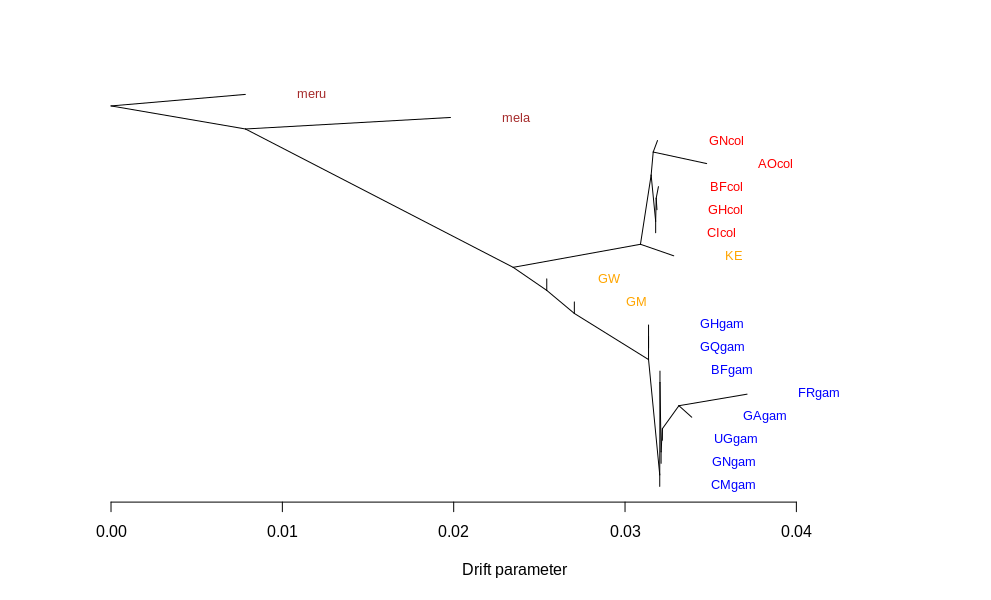

In [3]:
Image(filename='data/Treemix_data/merus_melas/3R_gste_out/Rplot01.png')

In [10]:
A = an_col
B = an_gam
C = 'KE'
D = 'mela'

In [11]:
f4_analys(A, B, C, D, chroms=("3R"),
                regions=(slice(1000000, 2820000), slice(2920000, 37000000)))

chromosome,test,D,SE,Z
3R,"D(AOcol, GHgam; KE, mela)",0.053,0.0057,9.3
3R,"D(AOcol, CMgam; KE, mela)",0.052,0.0049,10.7
3R,"D(AOcol, BFgam; KE, mela)",0.052,0.0049,10.7
3R,"D(AOcol, GNgam; KE, mela)",0.051,0.0045,11.3
3R,"D(AOcol, GQgam; KE, mela)",0.046,0.0062,7.4
3R,"D(AOcol, UGgam; KE, mela)",0.040,0.0043,9.3
3R,"D(AOcol, GAgam; KE, mela)",0.027,0.0060,4.5
3R,"D(AOcol, FRgam; KE, mela)",-0.056,0.0136,-4.1
3R,"D(BFcol, GHgam; KE, mela)",0.013,0.0045,2.8
3R,"D(BFcol, CMgam; KE, mela)",0.012,0.0033,3.5


In [13]:
A = an_col
B = an_gam
C = 'KE'
D = 'meru'
f4_analys(A, B, C, D, chroms=("3R"),
                regions=(slice(1000000, 2820000), slice(2920000, 37000000)))

chromosome,test,D,SE,Z
3R,"D(AOcol, GHgam; KE, meru)",0.057,0.0055,10.5
3R,"D(AOcol, CMgam; KE, meru)",0.056,0.0049,11.6
3R,"D(AOcol, BFgam; KE, meru)",0.057,0.0050,11.3
3R,"D(AOcol, GNgam; KE, meru)",0.056,0.0048,11.8
3R,"D(AOcol, GQgam; KE, meru)",0.049,0.0065,7.5
3R,"D(AOcol, UGgam; KE, meru)",0.044,0.0045,9.7
3R,"D(AOcol, GAgam; KE, meru)",0.033,0.0059,5.6
3R,"D(AOcol, FRgam; KE, meru)",-0.044,0.0142,-3.1
3R,"D(BFcol, GHgam; KE, meru)",0.012,0.0044,2.8
3R,"D(BFcol, CMgam; KE, meru)",0.012,0.0036,3.2


-------------------------------------------